In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
station = Base.classes.station

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

Text(0, 0.5, 'mm')

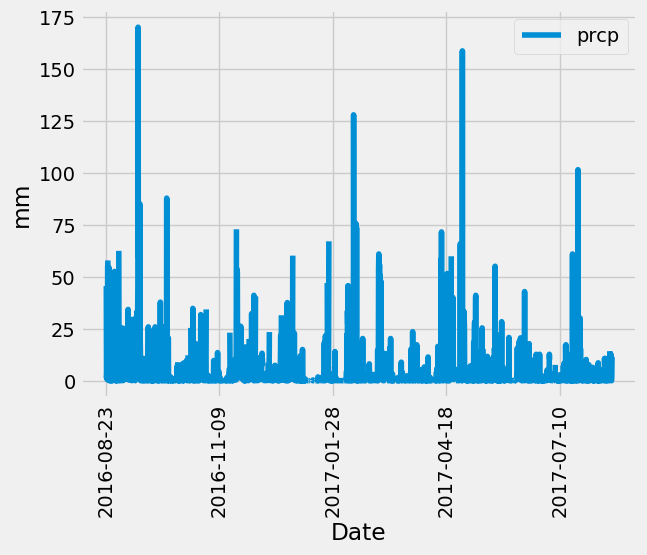

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()
date_prcp[:5]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
df

# Sort the dataframe by date
df_sorted = df.sort_values(by="date", ascending=True)
df_sorted

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("mm")


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()


,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station).group_by(Measurement.station).all()
active_stations

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = [func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)]
temperature
temp = session.query(*temperature).\
    filter(Measurement.station == 'USC00519281').all()
temp


[(12.2, 29.4, 22.03582251082252)]

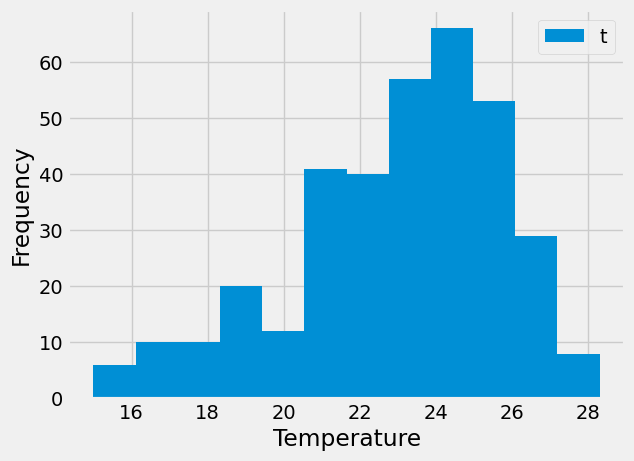

In [15]:
# Using the most active station id

## Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year).all()
year_temp[:5]

# Create a dataframe
tobs_df = pd.DataFrame(year_temp, columns=['date', 'tobs'])
tobs_df


# plot
plt.hist(tobs_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()